In [1]:
## Use of Transfer learning
## Importing libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
## Re-sizing all the images
image_size = [224, 224] ## ResNet50 works well with this image size. otherwise we can give any values. image_size=[height, width]

train_path = 'datasets/train'
test_path = 'datasets/test'

In [3]:
## Import ResNet50 library and add preprocessing layer to the front of ResNet50

resnet = ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

## [3] is used for RGB Channel
## we are using 'imagenet' weights (pre-trained)
## if we have 3 output category the we won't have to use TRUE. bcz we won't need first and last.

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
## This will not train existing weights, we will only train last layer.
for layer in resnet.layers:
    layer.trainable = False

In [6]:
## GLOB is useful for getting numbers of folders
folders = glob('datasets/train/*')

In [7]:
folders

['datasets/train\\audi',
 'datasets/train\\lamborghini',
 'datasets/train\\mercedes']

In [8]:
## Flattening the layer (we can add more layers too)
X = Flatten()(resnet.output)

In [9]:
## Creating DENSE layer. It will give us 3 Ouptputs
prediction = Dense(len(folders), activation = 'softmax')(X)

## Create model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv4_block2_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block2_2_relu (Activation (None, 14, 14, 256)  0           conv4_block2_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block2_3_conv (Conv2D)    (None, 14, 14, 1024) 263168      conv4_block2_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_3_bn (BatchNormali (None, 14, 14, 1024) 4096        conv4_block2_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_bloc

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
## Using ImageDataGenerator we are creating diff. types of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Scaling down the images, so that calculation can happen quickly
## Data Augmentation in train data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

## We should not do Data Augmentation in Test Data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
## Read images from directory and target_size sould be same as image_size
## Reading images from training datasets
training_set = train_datagen.flow_from_directory('datasets/train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
## Reading images from test datasets
test_set =  train_datagen.flow_from_directory('datasets/test',
                                             target_size = (224, 224),
                                             batch_size = (32),
                                              class_mode = "categorical"
                                             )


Found 58 images belonging to 3 classes.


In [17]:
## Fitting the model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 9s 7s/step - loss: 1.4670 - accuracy: 0.5469 - val_loss: 2.4342 - val_accuracy: 0.1724
Epoch 2/50
2/2 [==============================] - 9s 6s/step - loss: 1.7562 - accuracy: 0.4531 - val_loss: 1.7684 - val_accuracy: 0.4310
Epoch 3/50
2/2 [==============================] - 10s 7s/step - loss: 1.1062 - accuracy: 0.6719 - val_loss: 1.2248 - val_accuracy: 0.6207
Epoch 4/50
2/2 [==============================] - 10s 7s/step - loss: 1.0622 - accuracy: 0.6094 - val_loss: 1.6462 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 10s 7s/step - loss: 1.1829 - accuracy: 0.5938 - val_loss: 1.0223 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 9s 7s/step - loss: 0.6920 - accuracy: 0.6875 - val_loss: 1.5826 - val_accuracy: 0.4310
Epoch 7/50
2/2 [==============================] - 9s 7s/step - loss: 1.1465 - accuracy: 0.5781 - val_loss: 0.8735 - val_accuracy: 0.5517
Epoch 8/50
2/2 [======================

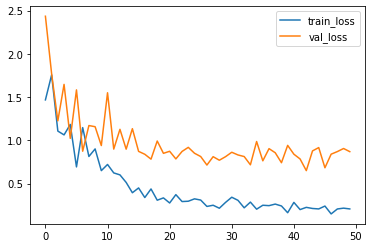

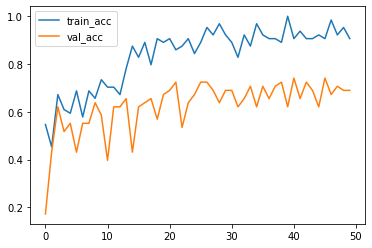

<Figure size 432x288 with 0 Axes>

In [19]:
## Plot the loss
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss') ## Validation loss is for test data
plt.legend()
plt.show()
plt.savefig('Loss_Val_loss')

## Plot the accuracy
plt.plot(r.history['accuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_Val_acc')

In [20]:
## Save it as h5 file
from tensorflow.keras.models import load_model
model.save('car_model_resnet50.h5')

C:\Anaconda\anaconda3\envs\py36\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Predicting the right image

In [27]:
y_pred = model.predict(test_set)

In [28]:
y_pred ## It gives the probability based on 3 classes

array([[1.29274547e-01, 2.92222202e-02, 8.41503203e-01],
       [1.72232818e-02, 7.81797290e-01, 2.00979471e-01],
       [3.29803862e-02, 2.22570717e-01, 7.44448900e-01],
       [7.21779764e-01, 1.66692302e-01, 1.11527927e-01],
       [4.45245057e-02, 8.75917196e-01, 7.95583203e-02],
       [1.28011331e-01, 6.24206841e-01, 2.47781873e-01],
       [9.25965726e-01, 6.78566024e-02, 6.17765961e-03],
       [4.71914597e-02, 8.30348730e-01, 1.22459799e-01],
       [2.04235762e-02, 4.78066742e-01, 5.01509666e-01],
       [1.27830744e-01, 7.63159037e-01, 1.09010212e-01],
       [7.67509490e-02, 6.37926953e-03, 9.16869700e-01],
       [6.16378963e-01, 2.23559797e-01, 1.60061270e-01],
       [9.83209193e-01, 9.20260139e-03, 7.58826686e-03],
       [4.19246182e-02, 4.81686890e-01, 4.76388425e-01],
       [4.02058102e-02, 3.69397968e-01, 5.90396225e-01],
       [2.87731260e-01, 3.63278145e-04, 7.11905420e-01],
       [2.46798284e-02, 9.66060460e-01, 9.25969426e-03],
       [6.92350447e-01, 2.03353

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1) ## Selecting the higest probability for the right prediction

In [30]:
y_pred ## Output

array([2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2], dtype=int64)

## Importing h5 model file and trying to predict the output

In [31]:
## importing model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model = load_model('car_model_resnet50.h5')

In [80]:
## Loading the image
img = image.load_img('datasets/test/mercedes/28.jpg', target_size=(224, 224))

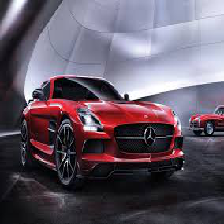

In [81]:
img

In [82]:
## Converting image into array
x = image.img_to_array(img)
x

array([[[ 45.,  45.,  45.],
        [ 43.,  43.,  43.],
        [ 38.,  38.,  40.],
        ...,
        [217., 218., 236.],
        [218., 219., 237.],
        [218., 219., 237.]],

       [[ 45.,  45.,  45.],
        [ 43.,  43.,  43.],
        [ 38.,  38.,  40.],
        ...,
        [218., 219., 237.],
        [218., 219., 237.],
        [218., 219., 237.]],

       [[ 45.,  45.,  45.],
        [ 43.,  43.,  43.],
        [ 38.,  38.,  40.],
        ...,
        [218., 219., 237.],
        [218., 219., 237.],
        [218., 219., 237.]],

       ...,

       [[  9.,  10.,  12.],
        [  9.,  10.,  12.],
        [ 11.,  12.,  14.],
        ...,
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.]],

       [[  9.,  10.,  12.],
        [  9.,  10.,  12.],
        [ 11.,  12.,  14.],
        ...,
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.],
        [ 39.,  40.,  45.]],

       [[  9.,  10.,  15.],
        [  9.,  10.,  15.],
        [ 11.,  

In [83]:
x.shape

(224, 224, 3)

In [84]:
x = x/255 ## In test data we divided image by 255, so we have to do the same here as well
x

array([[[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.16862746, 0.16862746, 0.16862746],
        [0.14901961, 0.14901961, 0.15686275],
        ...,
        [0.8509804 , 0.85490197, 0.9254902 ],
        [0.85490197, 0.85882354, 0.92941177],
        [0.85490197, 0.85882354, 0.92941177]],

       [[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.16862746, 0.16862746, 0.16862746],
        [0.14901961, 0.14901961, 0.15686275],
        ...,
        [0.85490197, 0.85882354, 0.92941177],
        [0.85490197, 0.85882354, 0.92941177],
        [0.85490197, 0.85882354, 0.92941177]],

       [[0.1764706 , 0.1764706 , 0.1764706 ],
        [0.16862746, 0.16862746, 0.16862746],
        [0.14901961, 0.14901961, 0.15686275],
        ...,
        [0.85490197, 0.85882354, 0.92941177],
        [0.85490197, 0.85882354, 0.92941177],
        [0.85490197, 0.85882354, 0.92941177]],

       ...,

       [[0.03529412, 0.03921569, 0.04705882],
        [0.03529412, 0.03921569, 0.04705882],
        [0.04313726, 0

In [85]:
## Expanding the dimentions
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [86]:
model.predict(img_data)

array([[0.19541048, 0.07903097, 0.7255586 ]], dtype=float32)

In [87]:
ans = np.argmax(model.predict(img_data), axis = 1)

In [88]:
ans

array([2], dtype=int64)